Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks' closing prices?  
4.) What was the correlation between different stocks' daily returns?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior?  

### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

### Overview

I have been provided the temperature database from the portal from where I have
extracted the data related to global temperature and the temperature of New Delhi. I have analyzed and compared the
temperature around the globle with New Delhi by selecting and extracting key data from the
database.

### Goals

1. Selecting city and country from the database “city_list”.
2. Extracting the City level data from the database “city_data” and export to CSV file.
3. Extracting the global temperature from the database “global_data” and export to CSV file.

### Tools Used:

1. SQL: To extract the data from the database
2. Python: For calculating moving average and plotting line chart
3. ANACONDA - Jupyter Notebook: For writing python code, making observations and writing the project

### Step 1: Extraction of data from the database

1. To check which countries and cities are available in the database.

    SELECT *
    
        FROM city_list WHERE Country='India'
    
        AND City='New Delhi';

2. To select data from the City database.

    SELECT avg_temp,year,city,country

        FROM city_data
  
        WHERE city='New Delhi';

3. I observed there is a column called avg_temp which is same in both city_data and global_data. I want to change the schema so I joined both the tables and changed the column names in both the databases.
 
    ALTER TABLE city_data
            RENAME COLUMN avg_temp to CAT;
    ALTER TABLE global_data
            RENAME COLUMN avg_temp to GAT;

4. I have joined the two tables using JOIN also called as INNER JOIN as avg_temp is same in both the tables.

    SELECT city_data.CAT, global_data.GAT, global_data.year
        FROM global_data
            JOIN city_data
                ON global_data.year = City_data.year
                    WHERE city=’New Delhi’ Country=’India’;

Now, I have got an option to download a CSV file. I downloaded file as “results.csv”.

### Step 2: Using Python for creating line charts

I have imported some python libraries here such as Numpy, Pandas (Matplotlib as well as Pyplot). I have written the code using Jupyter Notebook.

#### Observations:
1. The chart of the temperatures of New Delhi and Global Temperature shows that the difference between the average temperature of New Delhi and the World is very big.

2. The global data caused a slighty inclined result so I have plotted another graph for it which is the first graph.

3. The first graph shows the global temperature is increating constantly over the years by around 0.1 degree centigrade.

4. On the second graph I have observed that New Delhi has temperatures greater than the global average.

5. If I draw a line of best fit through the line of New Delhi, I can see a similar rise in temperature between New Delhi and the Global average over time. To verify this claim I used data.tail(10) to show me this trend continuing in the most recent years leading up to 2013.

6. New Delhi is a very hot city compared to most other cities in the world. From my research as a micro-study, New Delhi is surrounded by industrial factories and is nearby another city called Agra which also features large industrial facilities. Between them, they are two of the biggest industrial hubs in the world. I believe this may partly be the reason for the higher temperatures locally.

From my research as a macro-study, India itself lies nearer to the Equator so like most cities between the equator and the tropic of capricon or cancer it will have higher temperatures than the global average. Another reason for this is the area of these regions latitudally is very small compared to the rest of the globe so the temperatures fall as we move away from the equator. The Global Average Temperature is quite low compared to equatorial regions like New Delhi which can vary in temperature approximately between 8.4 to 9.6 degrees centigrade higher.

7. The temperature of the Globe is constantly rising from observing the second graph.

#### Considerations:

1. X-Axis: Years.
2. Y-Axis: Temperature(°C).
3. Different colors of lines for city and global average.
4. Use of Matplotlib library for visualization.
5. Applied Moving Average (MA) on city_data in order to get a relatively smooth line.
6. Defined functions for easier to understand coding.
7. Saved all of the code in .ipynb files (Jupyter Notebook) for later reference or revisions.

### References:

1. Change Column Name:
https://www.1keydata.com/sql/alter-table-rename-column.html
2. Joining the tables:
http://www.dofactory.com/sql/join
3. Calculation command for Moving Average in Python:
http://www.learndatasci.com/python-finance-part-3-moving-average-tradingstrategy/
4. Parameters for .rolling()
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

In [1]:
# Importing the important Libraries
import numpy as np
import pandas as pd # for loading data into the notebook
from matplotlib import pyplot as plt #for making line chart

In [2]:
# Importing the extracted Data Set
data = pd.read_csv( "results.csv" )

In [3]:
data

,year,gat,cat
0,1796,8.27,25.03
1,1797,8.51,26.71
2,1798,8.67,24.29
3,1799,8.51,25.28
4,1800,8.48,25.21
5,1801,8.59,24.22
6,1802,8.58,25.63
7,1803,8.50,25.38
8,1804,8.84,25.68
9,1805,8.56,25.30


This should define a function for the calculation of moving averages in order to get
smooth graph. And data.info should help show the data more clearly.

In [4]:
# function that calculates the MOVING AVERAGE
def moving_avg (mA_range, data_input):
    output = data_input.rolling(window = mA_range, on = "cat" ).mean().dropna()
    return output

In [5]:
# Function Calling with the range of Moving Average
mA_value = 150
chart_moving_avg = moving_avg(mA_value, data)

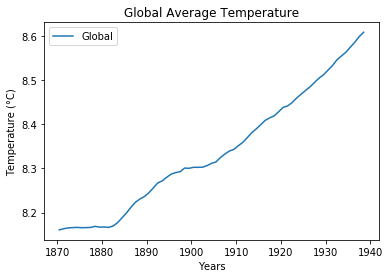

In [6]:
# Drawing the graph: Global Temperature
plt.plot(chart_moving_avg [ 'year' ], chart_moving_avg [ 'gat' ], label = 'Global' )
plt.legend()
plt.xlabel ( "Years" )
plt.ylabel ( "Temperature (°C)" )
plt.title ( "Global Average Temperature" )
plt.show ()

Above is the output. Next, I have analysed the global data separately in order to check and distinguish it from
combined data of New Delhi and Global Average temperatures.

Now combined with New Delhi data:

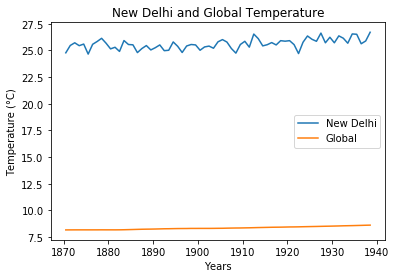

In [7]:
# Drawing the graph: New Delhi and Global Temperature
# Introducing this line in the previous code above the “global_data plot command”
plt.plot(chart_moving_avg ['year'], chart_moving_avg ['cat'], label = 'New Delhi')
plt.plot(chart_moving_avg ['year'], chart_moving_avg ['gat'], label = 'Global')
plt.legend()
plt.xlabel ( "Years" )
plt.ylabel ( "Temperature (°C)" )
plt.title ( "New Delhi and Global Temperature" )
plt.show ()

Above is the resulting graph. I have analysed my results further by adding:

In [8]:
data.head (10)

,year,gat,cat
0,1796,8.27,25.03
1,1797,8.51,26.71
2,1798,8.67,24.29
3,1799,8.51,25.28
4,1800,8.48,25.21
5,1801,8.59,24.22
6,1802,8.58,25.63
7,1803,8.50,25.38
8,1804,8.84,25.68
9,1805,8.56,25.30


In [9]:
data.tail (10)

,year,gat,cat
208,2004,9.32,26.24
209,2005,9.70,25.72
210,2006,9.53,26.37
211,2007,9.73,26.15
212,2008,9.43,25.68
213,2009,9.51,26.55
214,2010,9.70,26.52
215,2011,9.52,25.63
216,2012,9.51,25.89
217,2013,9.61,26.71
